In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 9

# Initialize grid
grid = np.zeros((grid_size, grid_size))

# Goal position
goal_position = (8, 8)
grid[goal_position] = 1  # Mark goal with a reward of +1

# Tunnel positions (IN and OUT)
tunnel_in = (3, 3)
tunnel_out = (6, 6)

# Discount factor
gamma = 0.9

# Convergence threshold
threshold = 0.001


In [2]:
def value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma=0.9, threshold=0.001):
    value_function = np.zeros(grid.shape)
    policy = np.zeros(grid.shape, dtype=int)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    while True:
        delta = 0
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if (i, j) == goal_position:
                    continue
                v = value_function[i, j]
                action_values = []
                for a, action in enumerate(actions):
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) == tunnel_in:
                        next_i, next_j = tunnel_out
                    if 0 <= next_i < grid_size and 0 <= next_j < grid_size:
                        action_values.append(value_function[next_i, next_j])
                    else:
                        action_values.append(v)  # Stay in place if action leads out of bounds
                value_function[i, j] = max(action_values) * gamma
                policy[i, j] = np.argmax(action_values)
                delta = max(delta, abs(v - value_function[i, j]))
        if delta < threshold:
            break
    
    return value_function, policy

V_vi, policy_vi = value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma, threshold)


In [3]:
def policy_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma=0.9, threshold=0.001):
    value_function = np.zeros(grid.shape)
    policy = np.zeros(grid.shape, dtype=int)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    def policy_evaluation(policy, value_function, grid):
        while True:
            delta = 0
            for i in range(grid.shape[0]):
                for j in range(grid.shape[1]):
                    if (i, j) == goal_position:
                        continue
                    v = value_function[i, j]
                    action = actions[policy[i, j]]
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) == tunnel_in:
                        next_i, next_j = tunnel_out
                    if 0 <= next_i < grid_size and 0 <= next_j < grid_size:
                        value_function[i, j] = grid[next_i, next_j] + gamma * value_function[next_i, next_j]
                    else:
                        value_function[i, j] = grid[i, j] + gamma * v
                    delta = max(delta, abs(v - value_function[i, j]))
            if delta < threshold:
                break

    while True:
        policy_stable = True
        policy_evaluation(policy, value_function, grid)
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if (i, j) == goal_position:
                    continue
                old_action = policy[i, j]
                action_values = []
                for a, action in enumerate(actions):
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) == tunnel_in:
                        next_i, next_j = tunnel_out
                    if 0 <= next_i < grid_size and 0 <= next_j < grid_size:
                        action_values.append(value_function[next_i, next_j])
                    else:
                        action_values.append(value_function[i, j])
                policy[i, j] = np.argmax(action_values)
                if old_action != policy[i, j]:
                    policy_stable = False
        if policy_stable:
            break
    
    return value_function, policy

V_pi, policy_pi = policy_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma, threshold)


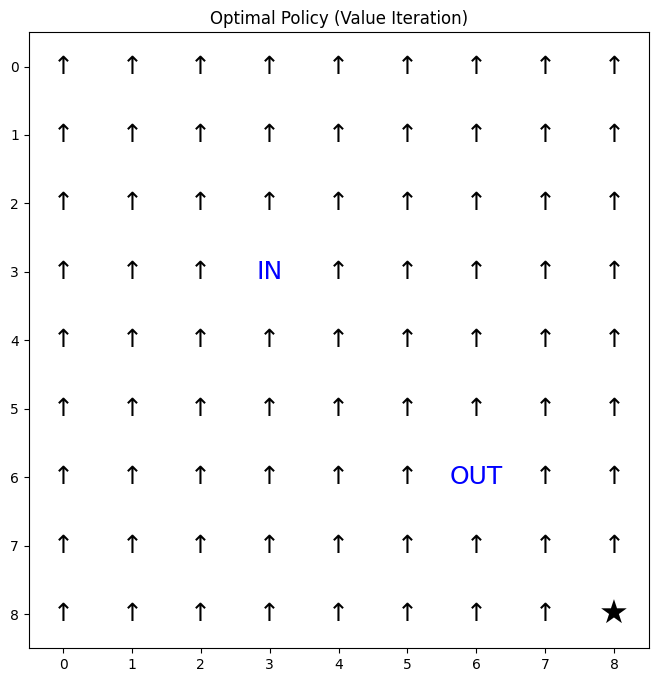

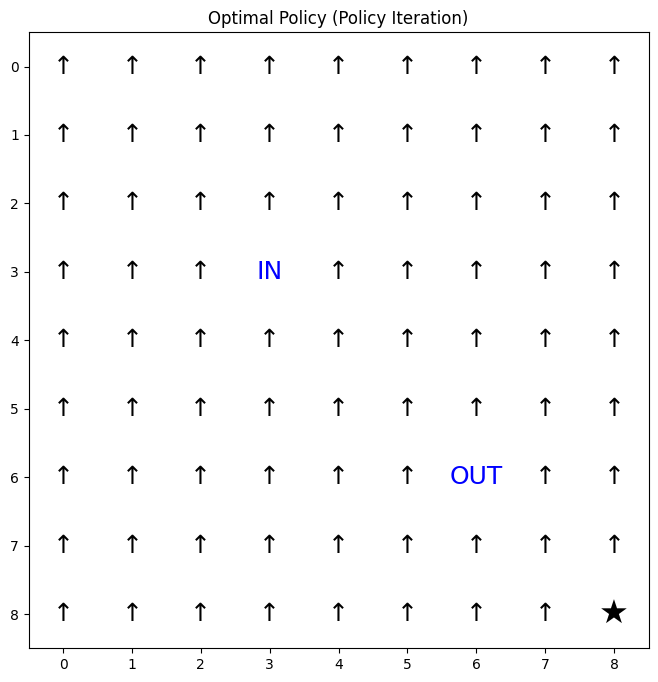

In [4]:
def plot_policy(policy, title="Optimal Policy"):
    actions_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    grid_policy = np.vectorize(actions_map.get)(policy)
    
    plt.figure(figsize=(8, 8))
    plt.title(title)
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_position:
                plt.text(j, i, "★", ha='center', va='center', fontsize=24)
            elif (i, j) == tunnel_in:
                plt.text(j, i, "IN", ha='center', va='center', fontsize=18, color='blue')
            elif (i, j) == tunnel_out:
                plt.text(j, i, "OUT", ha='center', va='center', fontsize=18, color='blue')
            else:
                plt.text(j, i, grid_policy[i, j], ha='center', va='center', fontsize=18)
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.gca().invert_yaxis()
    plt.show()

plot_policy(policy_vi, "Optimal Policy (Value Iteration)")
plot_policy(policy_pi, "Optimal Policy (Policy Iteration)")


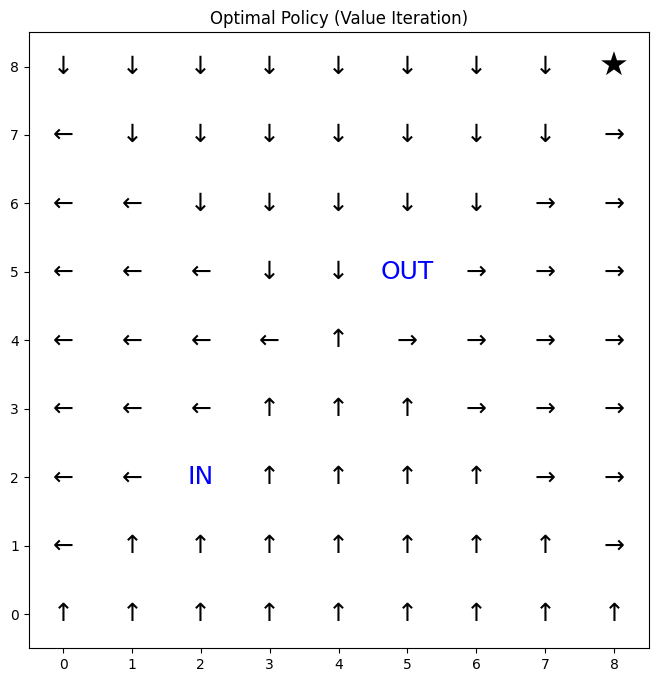

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 9

# Initialize grid
grid = np.zeros((grid_size, grid_size))

# Goal position
goal_position = (8, 8)
grid[goal_position] = 1  # Mark goal with a reward of +1

# Tunnel positions (IN and OUT)
tunnel_in = (2, 2)
tunnel_out = (5, 5)

# Discount factor
gamma = 0.9

# Convergence threshold
threshold = 0.001

def value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma=0.9, threshold=0.001):
    value_function = np.zeros(grid.shape)
    policy = np.zeros(grid.shape, dtype=int)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    while True:
        delta = 0
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if (i, j) == goal_position:
                    continue
                v = value_function[i, j]
                action_values = []
                for a, action in enumerate(actions):
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) == tunnel_in:
                        next_i, next_j = tunnel_out
                    if 0 <= next_i < grid_size and 0 <= next_j < grid_size:
                        action_values.append(-0.04 + gamma * value_function[next_i, next_j])
                    else:
                        action_values.append(v)  # Stay in place if action leads out of bounds
                value_function[i, j] = max(action_values)
                policy[i, j] = np.argmax(action_values)
                delta = max(delta, abs(v - value_function[i, j]))
        if delta < threshold:
            break
    
    return value_function, policy

V_vi, policy_vi = value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma, threshold)

def plot_policy(policy, title="Optimal Policy"):
    actions_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    grid_policy = np.vectorize(actions_map.get)(policy)
    
    plt.figure(figsize=(8, 8))
    plt.title(title)
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_position:
                plt.text(j, i, "★", ha='center', va='center', fontsize=24)
            elif (i, j) == tunnel_in:
                plt.text(j, i, "IN", ha='center', va='center', fontsize=18, color='blue')
            elif (i, j) == tunnel_out:
                plt.text(j, i, "OUT", ha='center', va='center', fontsize=18, color='blue')
            else:
                plt.text(j, i, grid_policy[i, j], ha='center', va='center', fontsize=18)
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.gca().axis()
    plt.show()

plot_policy(policy_vi, "Optimal Policy (Value Iteration)")


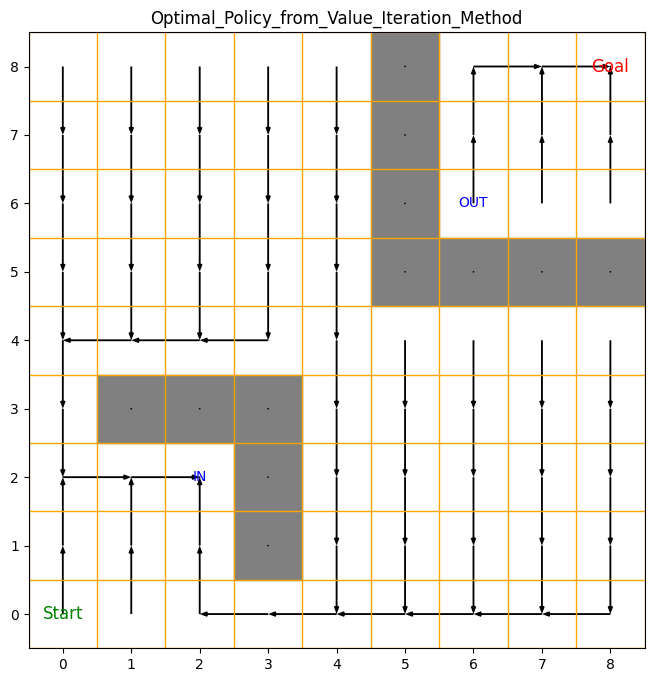

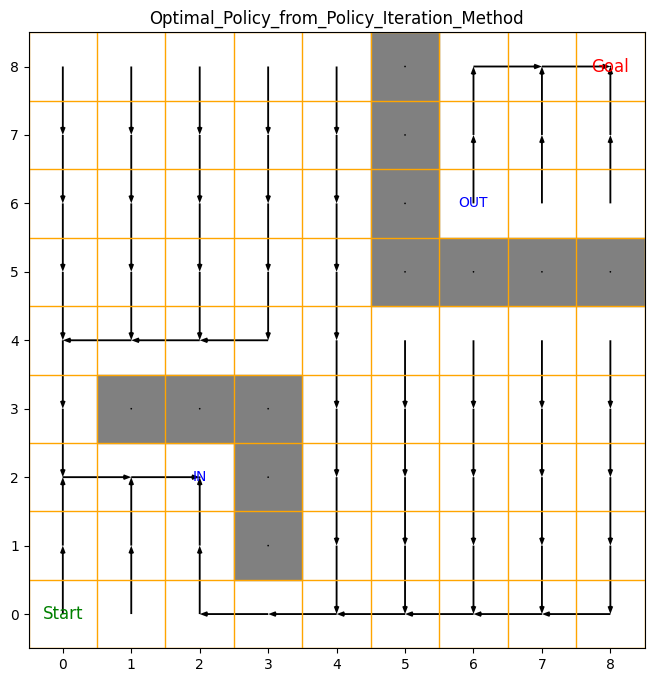

In [1]:
# -*- coding: utf-8 -*-
"""Question_2.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/14nMjEUV30O6hkrmD4pw5vAM8hNYJJatb
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

grid_size = 9
start_state = (0, 0)  # Starting position of Robot
goal_state = (8, 8)
obstacles = [(1, 3), (2, 3), (3, 3), (3, 2), (3, 1),
             (5, 5), (6, 5), (7, 5), (8, 5), (5, 6), (5, 7), (5, 8)]
in_portal = (2, 2)
out_portal = (6, 6)
actions = [(1, 0), (-1, 0), (0, -1), (0, 1)]  # Down, Up, Left, Right
gamma = 0.9  # Discount factor

# Define transition probabilities and rewards
def is_valid_state(s):
    return 0 <= s[0] < grid_size and 0 <= s[1] < grid_size and s not in obstacles

def get_next_state(s, a):
    next_state = (s[0] + a[0], s[1] + a[1])
    if not is_valid_state(next_state):
        return s
    if next_state == in_portal:
        return out_portal
    if next_state == out_portal:
        return out_portal
    return next_state

# Value Iteration
def value_iteration():
    V = np.zeros((grid_size, grid_size))
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                s = (i, j)
                if s == goal_state or s in obstacles:
                    continue
                v = V[i, j]
                Q = np.zeros(len(actions))
                for a_idx, a in enumerate(actions):
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    Q[a_idx] = reward + gamma * V[next_state[0], next_state[1]]
                V[i, j] = np.max(Q)
                policy[i, j] = actions[np.argmax(Q)]
                delta = max(delta, abs(v - V[i, j]))
        if delta < 1e-4:
            break
    return policy, V

# Policy Iteration
def policy_iteration():
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    V = np.zeros((grid_size, grid_size))
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for i in range(grid_size):
                for j in range(grid_size):
                    s = (i, j)
                    if s == goal_state or s in obstacles:
                        continue
                    a = tuple(policy[i, j])
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    v = V[i, j]
                    V[i, j] = reward + gamma * V[next_state[0], next_state[1]]
                    delta = max(delta, abs(v - V[i, j]))
            if delta < 1e-4:
                break

        # Policy Improvement
        policy_stable = True
        for i in range(grid_size):
            for j in range(grid_size):
                s = (i, j)
                if s == goal_state or s in obstacles:
                    continue
                old_action = tuple(policy[i, j])
                Q = np.zeros(len(actions))
                for a_idx, a in enumerate(actions):
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    Q[a_idx] = reward + gamma * V[next_state[0], next_state[1]]
                new_action = actions[np.argmax(Q)]
                policy[i, j] = new_action
                if old_action != new_action:
                    policy_stable = False
        if policy_stable:
            break
    return policy, V

# Plot policy


def plot_policy(policy, title):
    plt.figure(figsize=(8, 8))
    grid_size = policy.shape[0]

    # Create a grid for quiver plot
    X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    # Fill in direction vectors
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_state or (i, j) in obstacles or (i, j) == in_portal:
                continue
            action = policy[i, j]
            U[i, j] = action[1]  # Right is positive x direction
            V[i, j] = action[0]  # Down is positive y direction

    # Plot obstacles as solid walls
    for obs in obstacles:
        plt.gca().add_patch(patches.Rectangle((obs[1] - 0.5, obs[0] - 0.5), 1, 1, color='gray'))

    # Adjust quiver plot to ensure arrows are between cells
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='black', width=0.003, headlength=4)

    # Plot grid boundaries as full cells
    for x in range(grid_size + 1):
        plt.axhline(x - 0.5, color='orange', linewidth=1)
    for y in range(grid_size + 1):
        plt.axvline(y - 0.5, color='orange', linewidth=1)

    plt.xlim(-0.5, grid_size - 0.5)
    plt.ylim(-0.5, grid_size - 0.5)
    plt.grid(False)  # Disable default grid
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')

    # Add goal text
    plt.text(goal_state[1], goal_state[0], 'Goal', fontsize=12, ha='center', va='center', color='red')

    # Add start text
    plt.text(start_state[1], start_state[0], 'Start', fontsize=12, ha='center', va='center', color='green')

    # Add portals text
    plt.text(in_portal[1], in_portal[0], 'IN', fontsize=10, ha='center', va='center', color='blue')
    plt.text(out_portal[1], out_portal[0], 'OUT', fontsize=10, ha='center', va='center', color='blue')

    # plt.savefig(f"{title}.png")
    plt.show()



# Execute plotting
value_policy, _ = value_iteration()
plot_policy(value_policy, "Optimal_Policy_from_Value_Iteration_Method")

policy_policy, _ = policy_iteration()
plot_policy(policy_policy, "Optimal_Policy_from_Policy_Iteration_Method")